# Exploratory Data Analysis
Data Systems Project, Group F4

In [1]:
# ! pip install openpyxl --upgrade
# ! pip install wordcloud
# ! pip install textstat

In [2]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
from textstat import flesch_reading_ease
import re
import string

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katonazsofia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Auxilliary functions

In [4]:
def word_counter(words):
    wordfreq = {}
    
    # count the words
    for word in words:
        wordfreq[word] = wordfreq.get(word, 0) + 1
        
    return wordfreq    

In [5]:
# Create set of stopwords
stop_words = set(stopwords.words('english'))

def get_words_from_column(column, dataframe):

    # select the sentences
    sentences = []

    # split column into sentences
    for i in dataframe[column]:
        sentences.append(i.lower().split())
        
    # select words from sentences and make lower case
    words = [word.lower() for sentence in sentences for word in sentence]

    # remove stopwords
    words = [word for word in words if word not in stop_words]
    
    return words

In [6]:
def get_sentences_from_column(column, dataframe, printing=False):

    sentences = []

    for text in dataframe[column].dropna():
        sentences.extend(sent_tokenize(text))


    if printing:
        for idx, sentence in enumerate(sentences, start=1):
            print(f"{idx}. {sentence}")

    return sentences

In [7]:
def get_text_from_column(column, dataframe):
    full_text = ''

    for text in dataframe[column]:
        if type(text) == str:
            full_text += ' ' + text

    return full_text

In [8]:
# Function to remove punctuation.
def remove_punctuation(text):
    return ''.join(char for char in text if char not in string.punctuation)

# Function to remove stop words.
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))

    return [word for word in words if word.lower() not in stop_words]

# Showing most common phrases.
def get_phrases(sentences, n, k=None):
    '''
    :param: sentences: list of sentences to get phrases from.
    :param: n: number of words in phrase.
    :param: k: nr of top most frequent phrases to get.
    '''

    # Tokenizing sentences.
    tokenized_sentences = [remove_stopwords(word_tokenize(remove_punctuation(sentence.lower())))
                            for sentence in sentences]

    phrases = list(ngrams([word for sentence in tokenized_sentences for word in sentence], n))

    phrases = [' '.join(phrase) for phrase in phrases]

    if k is not None:
        freq_dist = FreqDist(phrases)

        common_phrases = freq_dist.most_common(k)

        return common_phrases
    
    return phrases

## Loading the dataset

In [9]:
df = pd.read_excel("taxonomy.xlsx")

In [10]:
# Select construction sector
df_construction = df[df["Sector"] == "Construction and real estate"]

In [11]:
df_construction.head()

,NACE,Sector,Activity number,Activity,Contribution type,Description,Substantial contribution criteria,DNSH on Climate adaptation,DNSH on Water,DNSH on Circular economy,DNSH on Pollution prevention,DNSH on Biodiversity,Unnamed: 12,Footnotes
82,"F41.1, F41.2, F43",Construction and real estate,7.1,Construction of new buildings,NaN,Development of building projects for residenti...,Constructions of new buildings for which:1. Th...,The activity complies with the criteria set ou...,"Where installed, except for installations in r...",At least 70 % (by weight) of the non-hazardous...,Building components and materials used in the ...,The activity complies with the criteria set ou...,NaN,(290) The calculated amount of energy needed t...
83,"F41, F43",Construction and real estate,7.2,Renovation of existing buildings,Transitional,Construction and civil engineering works or pr...,The building renovation complies with the appl...,The activity complies with the criteria set ou...,Where installed as part of the renovation work...,At least 70 % (by weight) of the non-hazardous...,Building components and materials used in the ...,NaN,NaN,(307) As set in the applicable national and re...
84,"F42, F43, M71, C16, C17, C22, C23, C25, C27, C...",Construction and real estate,7.3,"Installation, maintenance and repair of energy...",Enabling,Individual renovation measures consisting in i...,The activity consists in one of the following ...,The activity complies with the criteria set ou...,NaN,NaN,Building components and materials comply with ...,NaN,NaN,NaN
85,"F42, F43, M71, C16, C17, C22, C23, C25, C27, C28",Construction and real estate,7.4,"Installation, maintenance and repair of chargi...",Enabling,"Installation, maintenance and repair of chargi...","Installation, maintenance or repair of chargin...",The activity complies with the criteria set ou...,NaN,NaN,NaN,NaN,NaN,NaN
86,"F42, F43, M71, C16, C17, C22, C23, C25, C27, C28",Construction and real estate,7.5,"Installation, maintenance and repair of instru...",Enabling,"Installation, maintenance and repair of instru...",The activity consists in one of the following ...,The activity complies with the criteria set ou...,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Handle missing values by substituting empty string.
df_construction = df_construction.fillna('')

In [13]:
df_construction.head()

,NACE,Sector,Activity number,Activity,Contribution type,Description,Substantial contribution criteria,DNSH on Climate adaptation,DNSH on Water,DNSH on Circular economy,DNSH on Pollution prevention,DNSH on Biodiversity,Unnamed: 12,Footnotes
82,"F41.1, F41.2, F43",Construction and real estate,7.1,Construction of new buildings,,Development of building projects for residenti...,Constructions of new buildings for which:1. Th...,The activity complies with the criteria set ou...,"Where installed, except for installations in r...",At least 70 % (by weight) of the non-hazardous...,Building components and materials used in the ...,The activity complies with the criteria set ou...,,(290) The calculated amount of energy needed t...
83,"F41, F43",Construction and real estate,7.2,Renovation of existing buildings,Transitional,Construction and civil engineering works or pr...,The building renovation complies with the appl...,The activity complies with the criteria set ou...,Where installed as part of the renovation work...,At least 70 % (by weight) of the non-hazardous...,Building components and materials used in the ...,,,(307) As set in the applicable national and re...
84,"F42, F43, M71, C16, C17, C22, C23, C25, C27, C...",Construction and real estate,7.3,"Installation, maintenance and repair of energy...",Enabling,Individual renovation measures consisting in i...,The activity consists in one of the following ...,The activity complies with the criteria set ou...,,,Building components and materials comply with ...,,,
85,"F42, F43, M71, C16, C17, C22, C23, C25, C27, C28",Construction and real estate,7.4,"Installation, maintenance and repair of chargi...",Enabling,"Installation, maintenance and repair of chargi...","Installation, maintenance or repair of chargin...",The activity complies with the criteria set ou...,,,,,,
86,"F42, F43, M71, C16, C17, C22, C23, C25, C27, C28",Construction and real estate,7.5,"Installation, maintenance and repair of instru...",Enabling,"Installation, maintenance and repair of instru...",The activity consists in one of the following ...,The activity complies with the criteria set ou...,,,,,,


In [14]:
activity_numbers = [nr for nr in df_construction.loc[:, 'Activity number']]

In [15]:
text_col_indeces = [i for i in range(6,12)]

text_col_names = [name for name in df_construction.columns[text_col_indeces[0]:text_col_indeces[-1]+1]]

print('Name of free text columns:')
for name in text_col_names:
    print(name)

Name of free text columns:
Substantial contribution criteria
DNSH on Climate adaptation
DNSH on Water
DNSH on Circular economy
DNSH on Pollution prevention
DNSH on Biodiversity


In [16]:
# Store the pooled text in each column.
full_texts = {}

for col in text_col_names:
    full_texts[col] = get_text_from_column(col, df_construction)

In [17]:
# Stored the word tokenized text as a list of sentences in a nested dictionary.
tokenized_texts_per_activity = {}

for col in text_col_names:
    tokenized_texts_per_activity[col] = {}

    for i in df_construction.index:
        activity = df_construction.loc[i, 'Activity number']

        tokenized_texts_per_activity[col][activity] = [word_tokenize(sentence) for \
                                                       sentence in sent_tokenize(df_construction.loc[i, col])]

In [18]:
# Store the full tokenized texts as a list of sentences per column.
tokenized_texts = {}

for col in text_col_names:
    tokenized_texts[col] = []

    for activity in activity_numbers:
        tokenized_texts[col].extend(tokenized_texts_per_activity[col][activity])

## Sentence length

Plotting the distribution of sentence length for each of the free text columns.

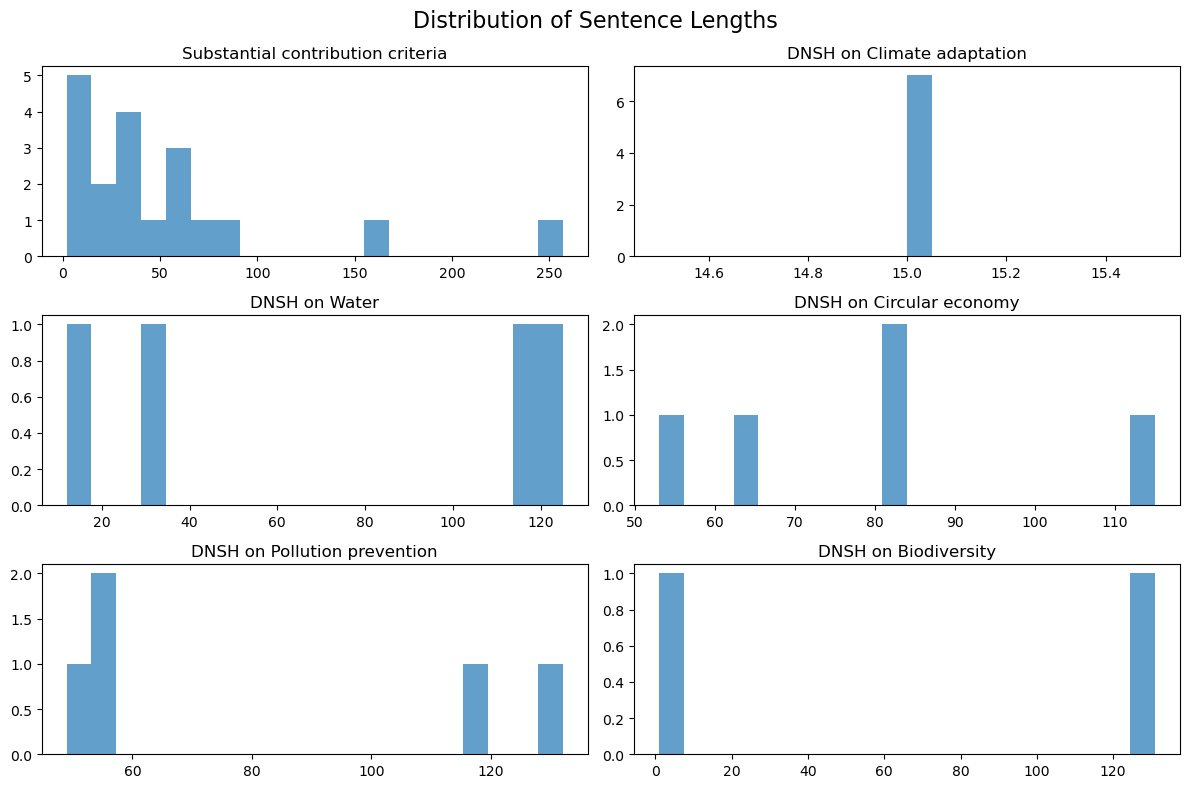

In [19]:
# Number of rows needed in the figure.
num_rows = (len(full_texts) // 2) + (len(full_texts) % 2)

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))
fig.suptitle('Distribution of Sentence Lengths', fontsize=16)

axes = axes.flatten()

for i, (col, text) in enumerate(tokenized_texts.items()):

    # Calculate the length of each sentence
    sentence_lengths = [len(sentence) for sentence in text]

    axes[i].hist(sentence_lengths, bins=20, alpha=0.7)
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()


## Number of sentences
Plotting the distribution of the number of sentences per activity.

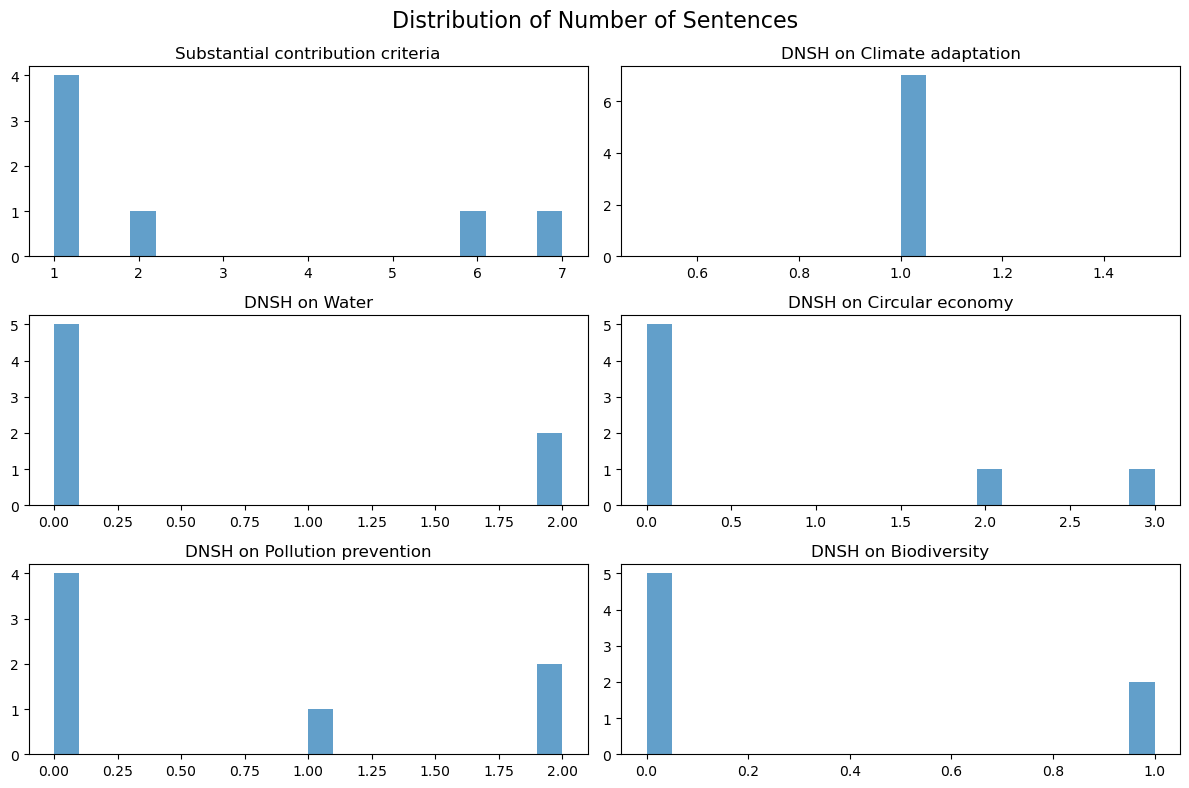

In [20]:
# Number of rows needed in the figure.
num_rows = (len(full_texts) // 2) + (len(full_texts) % 2)

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))
fig.suptitle('Distribution of Number of Sentences', fontsize=16)

axes = axes.flatten()

for i, (col,activities) in enumerate(tokenized_texts_per_activity.items()):

    # Calculate the length of each sentence
    nr_sentences = [len(text) for text in activities.values()]

    axes[i].hist(nr_sentences, bins=20, alpha=0.7)
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

## Word length
Plotting the distribution of word lengths across columns.

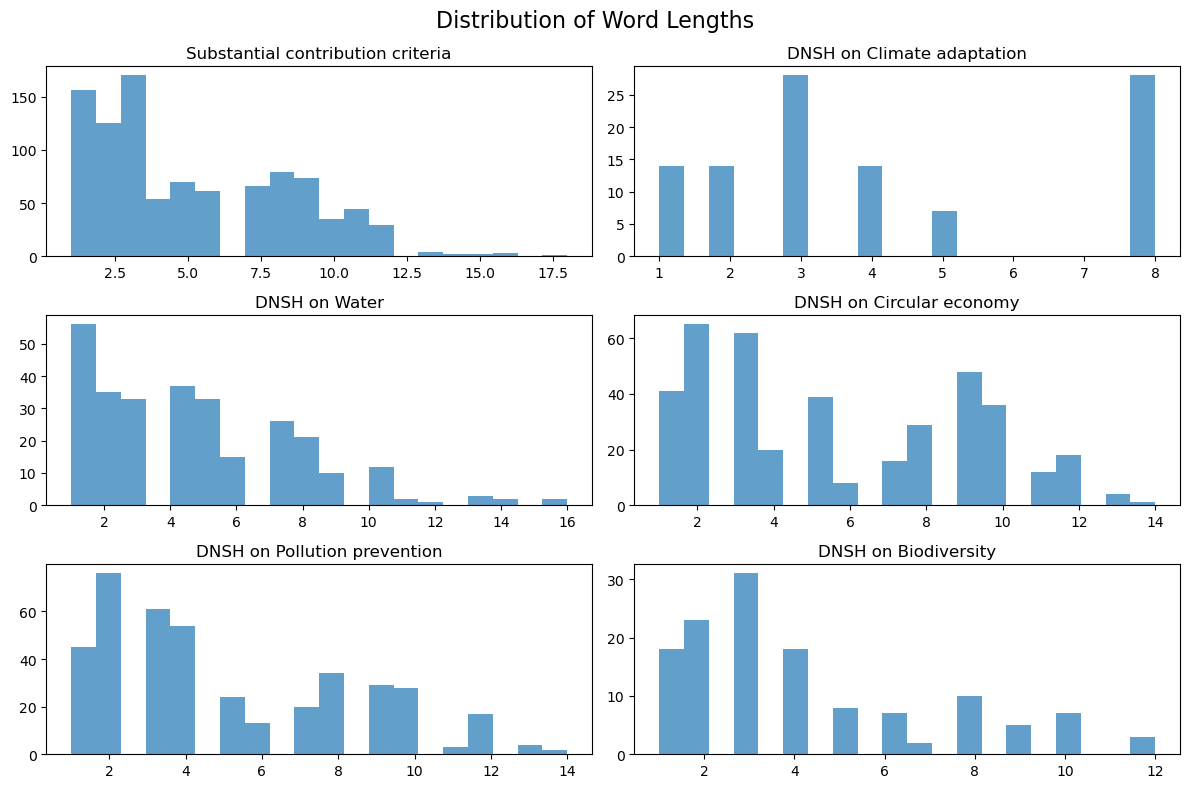

In [21]:
# Number of rows needed in the figure.
num_rows = (len(full_texts) // 2) + (len(full_texts) % 2)

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))
fig.suptitle('Distribution of Word Lengths', fontsize=16)

axes = axes.flatten()

for i, (col,text) in enumerate(tokenized_texts.items()):

    # Calculate the length of each sentence
    word_lengths = [len(word) for sentence in text for word in sentence]

    axes[i].hist(word_lengths, bins=20, alpha=0.7)
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

## Size of vocabulary

In [22]:
words_per_col = {}

for col, text in tokenized_texts.items():
    words_per_col[col] = []

    for sentence in text:
        for word in sentence:
            words_per_col[col].append(word)

#words_per_col = {col : text.split() for col, text in full_texts.items()}

# Add total list of words to dictionary.

total_words = []

for col, words in words_per_col.items():
    total_words.extend(words)

words_per_col['Pooled'] = total_words

vocab_per_col = {col : set(words) for col, words in words_per_col.items()}

vocab_size_per_col = {col : len(vocab) for col, vocab in vocab_per_col.items()}
    

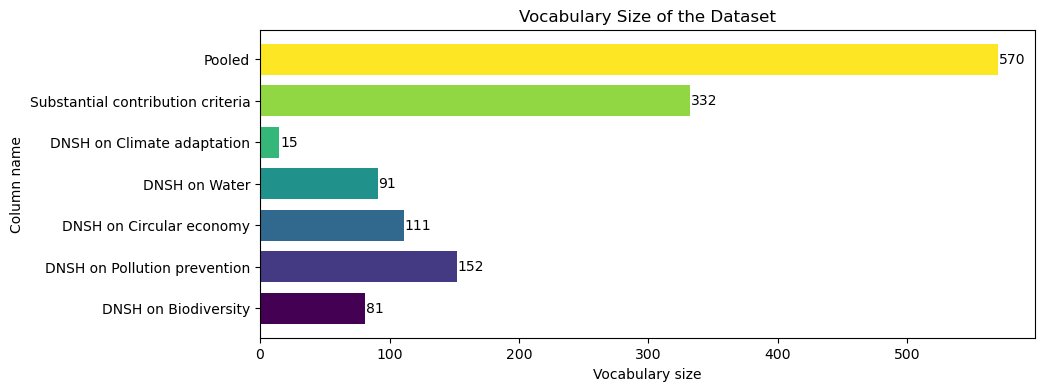

In [23]:
colors = plt.cm.viridis(np.linspace(0, 1, len(vocab_size_per_col)))

category_names = ['Pooled']
category_names.extend(text_col_names)
category_names = category_names[::-1]

values = [vocab_size_per_col[name] for name in category_names]

fig, ax = plt.subplots(figsize=(10, 4))

bars = ax.barh(category_names, values, color=colors, height=0.75)

for bar, value in zip(bars, values):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')

ax.set_xlabel('Vocabulary size')
ax.set_ylabel('Column name')
ax.set_title('Vocabulary Size of the Dataset')

plt.show()

## Flesch Reading Ease
Displaying the distribution of Fleisch Reading Ease across all cells with free text.

*Note:* Calculated as `FRE = 206.835 − 1.015 * (total words/total sentences) − 84.6 * (total syllables/ total words)`. Higher scores indicate material that is easier to read, lower numbers mark harder-to-read passages (0-30: College, 50-60: High school, 60+: Fourth grade). 

In [24]:
fre_scores = []

for col in text_col_names:
    for cell in df_construction[col]:
        if cell != '':
            fre_scores.append(flesch_reading_ease(cell))

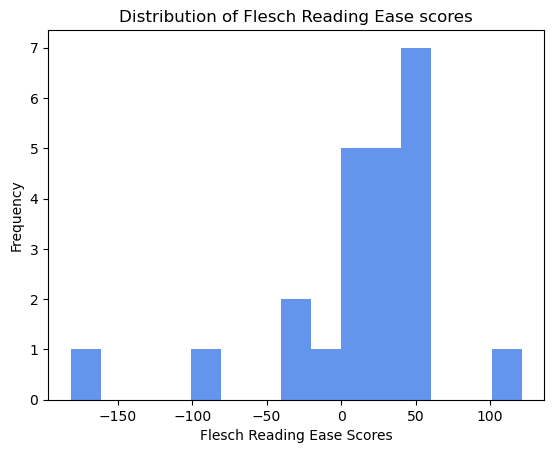

In [25]:
plt.hist(fre_scores, color='cornflowerblue', bins=15)

plt.title('Distribution of Flesch Reading Ease scores')
plt.xlabel('Flesch Reading Ease Scores')
plt.ylabel('Frequency')

plt.show()

## Checking most frequent words

In [26]:
wordfreq_per_col = {col : word_counter(get_words_from_column(col, df_construction)) \
                    for col in text_col_names}

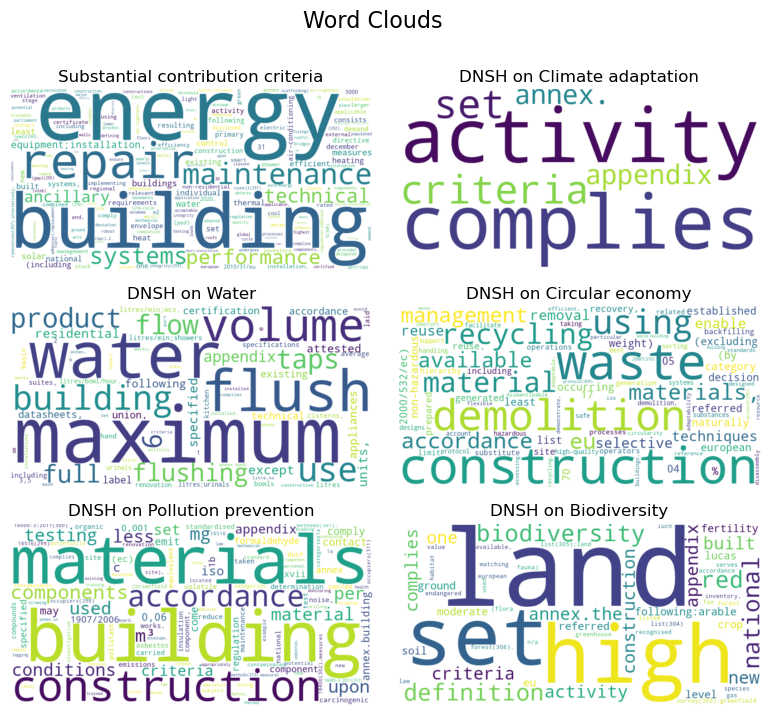

In [27]:
# Number of rows needed in the figure.
num_rows = (len(full_texts) // 2) + (len(full_texts) % 2)

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 8))
fig.suptitle('Word Clouds', fontsize=16)

axes = axes.flatten()

for i, (col,wordfreq) in enumerate(wordfreq_per_col.items()):

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordfreq)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    
    axes[i].set_title(f'{col}')

plt.subplots_adjust(wspace=0, hspace=0.2)
plt.show()

## Numerical information

In [28]:
sentences_per_col = {col : [] for col in text_col_names}

for col, sentences in sentences_per_col.items():
    for cell in df_construction[col]:
        if cell != '':
            sentences.extend(sent_tokenize(cell))

In [29]:
# Finding sentences with numerical information.

# Pattern is a number in a sentence
# BUT the numbers should not stand in brackets alone, as those refer to footnotes (e.g., (296))
# BUT the numbers should not be adjoint with a /, as those indicate regulations (e.g., 2010/30/EU)
# pattern = re.compile(r'\b\d{2,}(?!(\)|/))\b|\b\d+\([^\)]*\)(?!\d)|(?<!/)\b\d{2,}(?!\d)\b')

pattern = re.compile(r'(?<!\()(?<!/)\b\d+\b(?!\))(?!/)')

nr_numerical = {col : 0 for col in text_col_names}

for col, sentences in sentences_per_col.items():
    count = 0

    for sentence in sentences:
        count += len(re.findall(pattern, sentence))

    nr_numerical[col] = count

In [30]:
# Add the totall number of numerical information to the dictionary.
nr_numerical['Pooled'] = sum(list(nr_numerical.values()))

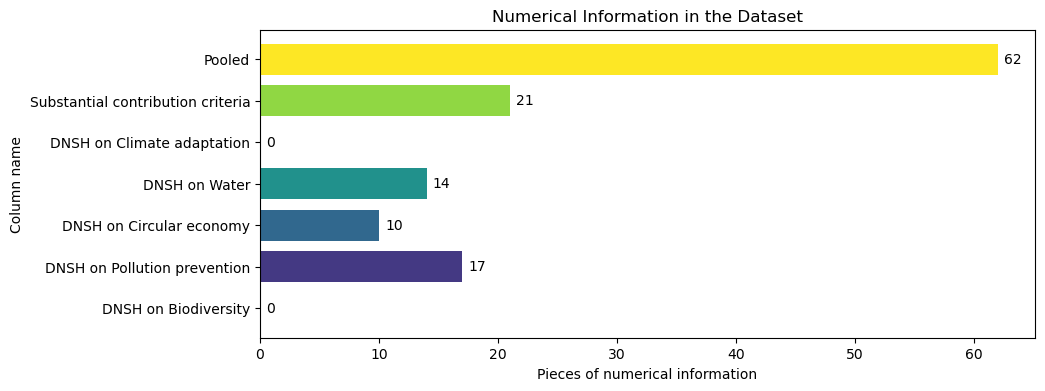

In [31]:
colors = plt.cm.viridis(np.linspace(0, 1, len(vocab_size_per_col)))

category_names = ['Pooled']
category_names.extend(text_col_names)
category_names = category_names[::-1]

values = [nr_numerical[name] for name in category_names]

fig, ax = plt.subplots(figsize=(10, 4))

bars = ax.barh(category_names, values, color=colors, height=0.75)

for bar, value in zip(bars, values):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')

ax.set_xlabel('Pieces of numerical information')
ax.set_ylabel('Column name')
ax.set_title('Numerical Information in the Dataset')

plt.show()